In [10]:
import numpy as np
from utils_clean import generate_sample, DEOptim, RandomOptim, PSOOptim, visualize_meshgrid, get_likelihood_grids#, #visualize_pred_meshgrid
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

## Generate Data

In [11]:

target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

X, y = generate_sample(70, n_dims, lower_bound, upper_bound, target_func)

In [12]:
rs = PSOOptim(c1=0.3, c2=0.5, w=0.9, n_particles=10, n_iters=50, visualize=True)
gpr_de = GaussianProcessRegressor(optimizer=rs.optimize, kernel=RBF(length_scale=(1, 1)))
gpr_de.fit(X.T, y[..., None])
y_pred = gpr_de.predict(X.T)
x_grid, y_grid, z_grid = get_likelihood_grids(gpr_de)
rs.visualize_optimization(x_grid, y_grid, z_grid, "Videos/zaeff.mp4")

2022-08-03 14:03:18,006 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.3, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=3.42e+4
2022-08-03 14:03:18,599 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 34180.21441856878, best pos: [-1.07240982 -1.08413781]
100%|██████████| 10000/10000 [00:05<00:00, 1759.05it/s]
2022-08-03 14:03:24,291 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2022-08-03 14:03:24,292 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 2.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y Videos/zaeff.mp4


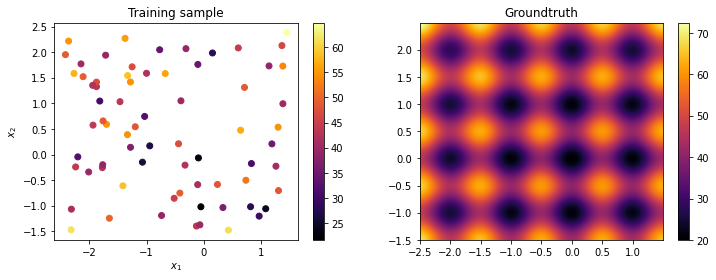

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[0], X[1], c=y, cmap="inferno")
plt.title("Training sample")
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.colorbar()
plt.subplot(122)
m = np.arange(-2.5,1.5,0.001)
p = np.arange(-1.5,2.5,0.001)
visualize_meshgrid(m, p, target_func, title='Groundtruth')
plt.show()

## GPR with Differential Evolution

In [5]:
optim = DEOptim()
gpr_de = GaussianProcessRegressor(optimizer=optim.optimize, kernel=RBF(length_scale=(1,1)))
gpr_de.fit(X.T, y[...,None])
y_pred = gpr_de.predict(X.T)

In [6]:
print(f'''Training Errors:
          Log Marginal Likelihood: {gpr_de.log_marginal_likelihood_value_}
          Mean Squared Error: {mean_squared_error(y, y_pred)}
          R2 Score: {r2_score(y, y_pred)}
          MAPE: {mean_absolute_percentage_error(y, y_pred)}
''')

Training Errors:
          Log Marginal Likelihood: -34146.9276407019
          Mean Squared Error: 9.980455787741346e-17
          R2 Score: 1.0
          MAPE: 1.5868688367407366e-10



In [7]:
visualize_pred_meshgrid(gpr_de, "GPR - Differential Evolution")

NameError: name 'visualize_pred_meshgrid' is not defined

In [ ]:
n = 100
x_grid = np.linspace(-10, 10, n)
y_grid = np.linspace(-10, 10, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid  = X_grid.swapaxes(0, 2)
X_grid = X_grid.reshape((-1, 2))
z = np.asarray([gpr_de.log_marginal_likelihood(X) for X in X_grid])
z = z.reshape(n, n)

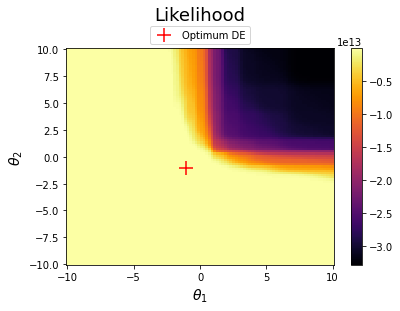

In [ ]:
plt.pcolormesh(x_grid, y_grid, z, cmap="inferno")
plt.colorbar()
plt.scatter(gpr_de.kernel_.theta[0], gpr_de.kernel_.theta[1], marker="+", color="red", s=200, label="Optimum DE")
plt.xlabel(r"$\theta_1$", fontsize=14)
plt.ylabel(r"$\theta_2$", fontsize=14)
plt.title("Likelihood", y=1.1, fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125, 0, 0))

In [ ]:
n = 100
x_grid = np.linspace(-5, -0.75, n)
y_grid = np.linspace(-5, -0.75, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid  = X_grid.swapaxes(0, 2)
X_grid = X_grid.reshape((-1, 2))
z = np.asarray([gpr_de.log_marginal_likelihood(X) for X in X_grid])
z = z.reshape(n, n)

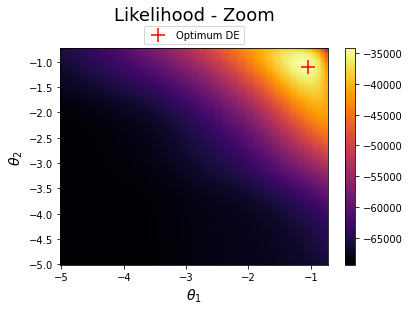

In [ ]:
plt.pcolormesh(x_grid, y_grid, z, cmap="inferno")
plt.colorbar()
plt.scatter(gpr_de.kernel_.theta[0], gpr_de.kernel_.theta[1], marker="+", color="red", s=200, label="Optimum DE")
plt.xlabel(r"$\theta_1$", fontsize=14)
plt.ylabel(r"$\theta_2$", fontsize=14)
plt.title("Likelihood - Zoom", y=1.1, fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125, 0, 0))

## GPR with Random Search

In [ ]:
rs = RandomOptim(n_iters=100, visualize=True)
gpr_rs = GaussianProcessRegressor(optimizer=rs.optimize, kernel=RBF(length_scale=(1,1)))
gpr_rs.fit(X.T, y[...,None])
y_pred = gpr_rs.predict(X.T)
from utils_clean import get_log_likelihood
x, y, z = get_log_likelihood(gpr_rs)
rs.visualize_optimization(x, y, z, "Random Search.mp4")

In [ ]:
rs.pos_hist.shape

(100, 1, 2)

In [ ]:
from utils_clean import get_log_likelihood
x, y, z = get_log_likelihood(gpr_rs)
rs.visualize_optimization(x, y, z, "Random Search.mp4")

100%|██████████| 100/100 [00:00<00:00, 1279.85it/s]
2022-08-03 09:06:03,363 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2022-08-03 09:06:03,365 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 2.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y 'Random Search.mp4'


AttributeError: 'AxesSubplot' object has no property 'cmap'

<Figure size 432x288 with 0 Axes>

In [ ]:
print(f'''Training Errors:
          Log Marginal Likelihood: {gpr_rs.log_marginal_likelihood_value_}
          Mean Squared Error: {mean_squared_error(y, y_pred)}
          R2 Score: {r2_score(y, y_pred)}
          MAPE: {mean_absolute_percentage_error(y, y_pred)}
''')

Training Errors:
          Log Marginal Likelihood: -60232.37943734049
          Mean Squared Error: 1.9686274913765865e-16
          R2 Score: 1.0
          MAPE: 1.396860755724285e-10



In [ ]:
n = 100
x_grid = np.linspace(-10, 10, n)
y_grid = np.linspace(-10, 10, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid  = X_grid.swapaxes(0, 2)
X_grid = X_grid.reshape((-1, 2))
z = np.asarray([gpr_de.log_marginal_likelihood(X) for X in X_grid])
z = z.reshape(n, n)

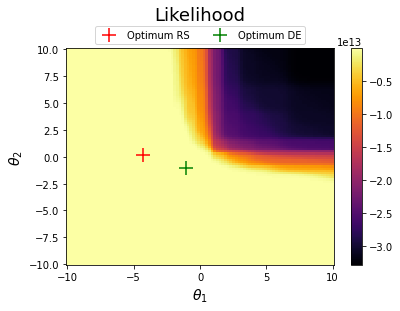

In [ ]:
plt.pcolormesh(x_grid, y_grid, z, cmap="inferno")
plt.colorbar()
plt.scatter(gpr_rs.kernel_.theta[0], gpr_rs.kernel_.theta[1], marker="+", color="red", s=200, label="Optimum RS")
plt.scatter(gpr_de.kernel_.theta[0], gpr_de.kernel_.theta[1], marker="+", color="green", s=200, label="Optimum DE")
plt.xlabel(r"$\theta_1$", fontsize=14)
plt.ylabel(r"$\theta_2$", fontsize=14)
plt.title("Likelihood", y=1.1, fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125, 0, 0), ncol=2)

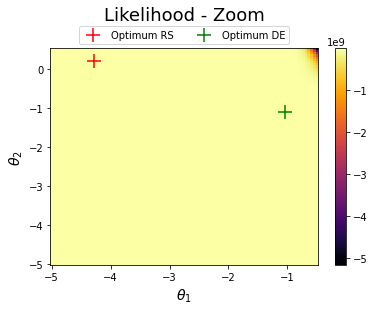

In [ ]:
n = 100
x_grid = np.linspace(-5, -0.5, n)
y_grid = np.linspace(-5, 0.5, n)
X_grid = np.array(np.meshgrid(x_grid, y_grid))
X_grid  = X_grid.swapaxes(0, 2)
X_grid = X_grid.reshape((-1, 2))
z = np.asarray([gpr_de.log_marginal_likelihood(X) for X in X_grid])
z = z.reshape(n, n)

plt.pcolormesh(x_grid, y_grid, z, cmap="inferno")
plt.colorbar()
plt.scatter(gpr_rs.kernel_.theta[0], gpr_rs.kernel_.theta[1], marker="+", color="red", s=200, label="Optimum RS")
plt.scatter(gpr_de.kernel_.theta[0], gpr_de.kernel_.theta[1], marker="+", color="green", s=200, label="Optimum DE")
plt.xlabel(r"$\theta_1$", fontsize=14)
plt.ylabel(r"$\theta_2$", fontsize=14)
plt.title("Likelihood - Zoom", y=1.1, fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.125, 0, 0), ncol=2)